In [1]:
import pandas as pd
import re


In [2]:
reviews = pd.read_csv('Train.csv')

In [3]:
reviews.head()

,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos


In [4]:
reviews.shape

(40000, 2)

In [5]:
reviews.info

<bound method DataFrame.info of                                                   review label
0      mature intelligent and highly charged melodram...   pos
1      http://video.google.com/videoplay?docid=211772...   pos
2      Title: Opera (1987) Director: Dario Argento Ca...   pos
3      I think a lot of people just wrote this off as...   pos
4      This is a story of two dogs and a cat looking ...   pos
...                                                  ...   ...
39995  There are similarities between Ray Lawrence's ...   neg
39996  For starters, I once met the director when he ...   neg
39997  Much of "Over Her Dead Body" is so painfully u...   neg
39998  "Lifeforce" is a truly bizarre adaptation of t...   pos
39999  I saw this movie at a screener and its the bes...   pos

[40000 rows x 2 columns]>

In [6]:
reviews.label.value_counts()

pos    20011
neg    19989
Name: label, dtype: int64

In [7]:
# Replace pos with 1 and neg with 0
reviews.label.replace('pos',1,inplace=True)
reviews.label.replace('neg',0,inplace = True)


In [8]:
reviews.tail()

,review,label
39995,There are similarities between Ray Lawrence's ...,0
39996,"For starters, I once met the director when he ...",0
39997,"Much of ""Over Her Dead Body"" is so painfully u...",0
39998,"""Lifeforce"" is a truly bizarre adaptation of t...",1
39999,I saw this movie at a screener and its the bes...,1


### Creating NLTK pipeline

In [9]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [10]:
tokenizer = RegexpTokenizer(r'\w+') # Select all the words
ps = PorterStemmer()
en_sw = set(stopwords.words('english'))

In [11]:
def getStemmedReview(review):
    #convert all to lower case
    review = review.lower()
    #replace all the br with space
    review = review.replace('<br /><br />',' ')
    #Tokenize 
    #Remove the digit contained word as wwll
    review=re.sub(r"[A-Za-z]+\d+|\d+[A-Za-z]+",'',review).strip()
    tokens = tokenizer.tokenize(review)
    new_tokens = [token for token in tokens if token not in en_sw]
    ste_tokens = [ps.stem(token) for token in new_tokens]
    
    cleaned_review = ' '.join(ste_tokens)
    return cleaned_review
    

In [12]:
reviews.review = reviews.review.apply(getStemmedReview)

In [13]:
reviews.head(10)

,review,label
0,matur intellig highli charg melodrama unbelive...,1
1,http video googl com videoplay docid 211772166...,1
2,titl opera 1987 director dario argento cast cr...,1
3,think lot peopl wrote anoth one tom cruis weir...,1
4,stori two dog cat look way back home old wise ...,1
5,steve carel come first star role 40 year old v...,1
6,go write requir howev summari put top way word...,0
7,ok riski move rent flick thought noth lose wel...,0
8,cannib pair cinemat refer delicatessen plot st...,1
9,one great modern kung fu film lot review seem ...,1


In [14]:
X = reviews.review.values
y = reviews.label.values

### Spliting the datasets into train and test

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
trainx,testx,trainy,testy = train_test_split(X,y,test_size=0.2,random_state=9)
print("Train shapes : X = {}, y = {}".format(trainx.shape,trainy.shape))
print("Test shapes : X = {}, y = {}".format(testx.shape,testy.shape))

Train shapes : X = (32000,), y = (32000,)
Test shapes : X = (8000,), y = (8000,)


In [17]:
def getStemmedFile(inputFile,outputFile):
    output = open(outputFile,'w',encoding='utf-8')
    
    with open(inputFile,encoding='utf-8') as f:
        reviews = f.readlines()
    for review in reviews:
        cleaned_review = getStemmedReview(review)
        print(cleaned_review,file = output)
    output.close()

In [18]:
#cleaned = reviews.review.apply(getStemmedReview)

# Using Sklearn for creating NLP pipeline and implementing naive bayes

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
cv = CountVectorizer(ngram_range=(1,2))

In [21]:
X = cv.fit_transform(trainx)

In [22]:
xtest = cv.transform(testx)

In [23]:
X.shape

(32000, 1918308)

In [24]:
cv.get_feature_names()

['00',
 '00 19',
 '00 84',
 '00 90',
 '00 acorn',
 '00 agent',
 '00 air',
 '00 back',
 '00 believ',
 '00 bin',
 '00 binâ',
 '00 blockbust',
 '00 brief',
 '00 budget',
 '00 buy',
 '00 case',
 '00 cash',
 '00 chanc',
 '00 close',
 '00 come',
 '00 copi',
 '00 coupl',
 '00 cover',
 '00 cut',
 '00 degre',
 '00 doc',
 '00 dollar',
 '00 dvd',
 '00 end',
 '00 feel',
 '00 feet',
 '00 figur',
 '00 film',
 '00 final',
 '00 fix',
 '00 flip',
 '00 franki',
 '00 get',
 '00 graphic',
 '00 great',
 '00 groceri',
 '00 hate',
 '00 hour',
 '00 includ',
 '00 inflat',
 '00 junior',
 '00 keoni',
 '00 knew',
 '00 known',
 '00 lb',
 '00 less',
 '00 local',
 '00 look',
 '00 made',
 '00 make',
 '00 mart',
 '00 mayb',
 '00 money',
 '00 movi',
 '00 nbc',
 '00 need',
 '00 needless',
 '00 news',
 '00 night',
 '00 nowaday',
 '00 oh',
 '00 one',
 '00 outlay',
 '00 paint',
 '00 per',
 '00 perfect',
 '00 pm',
 '00 pop',
 '00 purchas',
 '00 put',
 '00 redeem',
 '00 rent',
 '00 rental',
 '00 replac',
 '00 sale',
 '00 sch

### Implementing Algorithams

In [25]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

In [26]:
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()

In [27]:
mnb.fit(X,trainy)

MultinomialNB()

In [28]:
mnb.predict(xtest)

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [29]:
mnb.score(xtest,testy)

0.876375

# 85% accuracy in MNB As we create bigrams our accuracy incr to 88%

In [30]:
bnb.fit(X,trainy)

BernoulliNB()

In [31]:
bnb.score(xtest,testy)

0.86225

# 84% accurcy in BNB

In [32]:
# Due to insuuufficient storage i have to take just 100 thats why accuracy decresses

x = X[:100].toarray()
gnb.fit(x,trainy[:100])

MemoryError: Unable to allocate 1.43 GiB for an array with shape (100, 1918308) and data type int64

In [ ]:
gnb.predict(xtest[:100].toarray())

In [ ]:
gnb.score(xtest[:100].toarray(),testy[:100])

### Predicting Test dataset

In [33]:
test = pd.read_csv('Test.csv')

In [34]:
test.head(10)

,review
0,Remember those old kung fu movies we used to w...
1,This movie is another one on my List of Movies...
2,How in the world does a thing like this get in...
3,"""Queen of the Damned"" is one of the best vampi..."
4,The Caprica episode (S01E01) is well done as a...
5,I usually really enjoy Steven Seagal movies. T...
6,JiÃ¸Ã­ Trnka made his last animated short an i...
7,This is so bad it will be my contribution to t...
8,Watching this hilariously retro but very enter...
9,"Excellent political thriller, played much quie..."


In [35]:
test = test.review.apply(getStemmedReview)

KeyboardInterrupt: 

In [ ]:
testX = test.values

In [ ]:
testX = cv.transform(testX)

In [ ]:
Y = mnb.predict(testX)

In [ ]:
df = pd.DataFrame(test, columns=['review','label'])

In [ ]:
df.label = Y

In [ ]:
df.head(10)

In [ ]:
df.to_csv('output.csv',index = False)

### Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cnf_matrix = confusion_matrix(mnb.predict(xtest),testy)

In [38]:
cnf_matrix

array([[3550,  572],
       [ 417, 3461]], dtype=int64)

In [39]:
from sklearn.metrics import plot_confusion_matrix

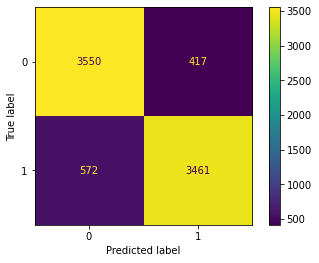

In [44]:
plot_confusion_matrix(mnb, xtest,testy)